# Magnetic field of a circular current loop

According to [Hampton et
al](https://pubs.aip.org/aip/adv/article/10/6/065320/997382/Closed-form-expressions-for-the-magnetic-fields-of),
a circular loop in $(x,y)$ plane centered at the origin with radius
*a* created the field in cylindrical coordinates $(r,\theta,z)$ is

$$B_r=\frac{B_aaz}{\pi r\sqrt{(a+r)^2+z^2}}\left(\frac{a^2+r^2+z^2}{(a-r)^2+z^2}E(m)-K(m)\right),$$
$$B_z=\frac{B_aa}{\pi\sqrt{(a+r)^2+z^2}}\left(\frac{a^2+r^2+z^2}{(a-r)^2+z^2}E(m)+K(m)\right),$$
$$B_{\theta}=0,$$
$$m=\frac{4ar}{(a+r)^2+z^2},$$

The factor $B_a=\mu_0I/(2a)$ is the field at the center of the loop, and $I$ is the loop current.

$K(m)$ and $E(m)$ are complete elliptic integrals of [the
first](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipk.html) and [the
second](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipe.html#scipy.special.ellipe)
kind.  For $m\ll 1$, $K(m)=(\pi/2)(1+m^2/O(m^4))$ and $E(m)=(\pi/2)(1-m^2/4+O(m^4))$.

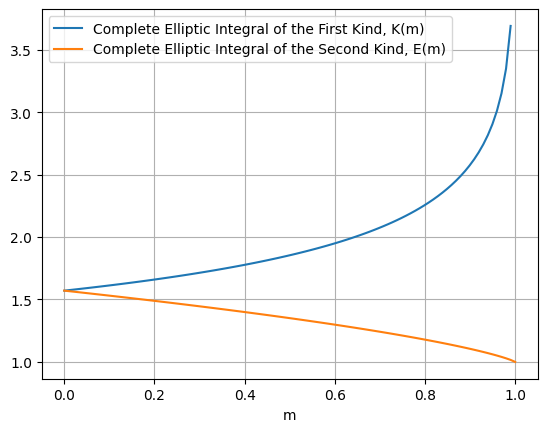

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipe

# Generate a range of 'm' values (parameter of the elliptic integral)
# 'm' must be between 0 and 1 for real values of complete elliptic integrals
m_values = np.linspace(0, 1, 100)

# Calculate the values of the complete elliptic integrals
K_values = ellipk(m_values)
E_values = ellipe(m_values)

# Create the plot
plt.figure()
plt.plot(m_values, K_values, label='Complete Elliptic Integral of the First Kind, K(m)')
plt.plot(m_values, E_values, label='Complete Elliptic Integral of the Second Kind, E(m)')

# Add labels and title
plt.xlabel('m')
#plt.ylabel('Integral Value')
#plt.title('Complete Elliptic Integrals')
plt.legend()
plt.grid(True)
plt.show() # looks wrong: both must have zero derivative at zero

Switching to cartesian is achieved by

$$r(x,y)=\sqrt{x^2+y^2},\quad \theta(x,y)={\tt np.atan2}(y,x),$$
$$B_x=B_r\cos(\theta)=B_r\frac{x}{r(x,y)},\quad B_y=B_r\sin(\theta)=B_r\frac{y}{r(x,y)}.$$

If the loop center $(x,y)$ is at $(\xi,0)$, we need to change $x\to x-\xi$ in the formulas.

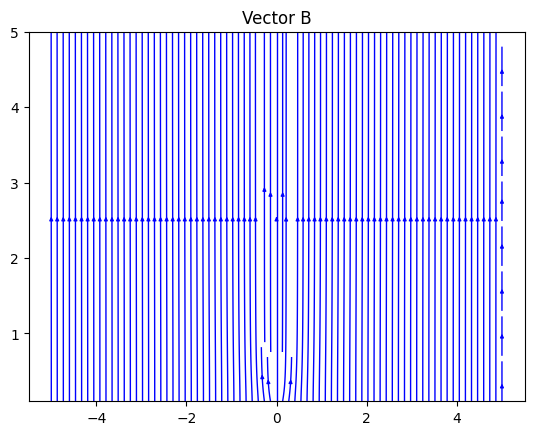

In [5]:
def loop_field(x, y, z, a, B_a):
    r = np.hypot(x, y)
    dplus = (a + r)**2 + z**2
    dminus = (a - r)**2 + z**2
    m = 4*a*r/dplus
    afac = B_a*a/(np.pi*np.sqrt(dplus))
    efac = (a**2 + r**2 + z**2)/dminus
    em = ellipe(m)
    km = ellipk(m)
    B_r  = afac*z/r*(efac*em - km)
    B_z  = afac    *(efac*em + km)
    # return B_r*x/r, B_r*y/r, B_z
    return B_r*x/r, B_z # (x, z) only
    
xmin, xmax = -5, 5
zmin, zmax = 0.1,5
npoints = 150
xx = np.linspace(xmin, xmax, npoints)
zz = np.linspace(zmin, zmax, npoints)
xx_grid, zz_grid = np.meshgrid(xx, zz)
Bx, Bz = loop_field(xx_grid, 0, zz_grid, 0.2, 1)
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
ax.streamplot(xx_grid, zz_grid, Bx, Bz, density=2.5, color='b',
            linewidth=1, cmap=plt.cm.viridis, arrowsize=0.5)
ax.set_title('Vector B')
plt.show() # looks wrong

# Direct from Biot-Savart

$\newcommand{\bfL}{{\bf L}}$
$\newcommand{\bfB}{{\bf B}}$
$\newcommand{\bfx}{{\bf x}}$

For a closed loop defined parametrically with a periodic finction $\bfL(t)$, the magnetic field (up to a constant factor) is
$$\bfB(\bfx)=\oint dt\frac{\dot\bfL(t)\times(\bfx-\bfL)}{|\bfx-\bfL|^3}.$$

Let $\bfL(t)=(a\cos(t), a\sin(t), 0)$ be a circle in the $(x,y)$ plane.  Then
$$
\begin{aligned}
\dot\bfL &= (-a\sin(t), a\cos(t), 0),\\
\bfx-\bfL &= (x-a\cos(t), y-b\sin(t), z),\\
\dot\bfL\times(\bfx-\bfL) &= (a\cos(t)z, a\sin(t)z, -a\sin(t)(y-a\sin(t))-a\cos(t)(x-a\cos(t))).
\end{aligned}
$$

The field is then
$$\bfB(a, \bfx) = a\oint dt\frac{(\cos(t)z, \sin(t)z, -\sin(t)(y-a\sin(t))-\cos(t)(x-a\cos(t)))}
{[(x-a\cos(t))^2 + (y-a\sin(t))^2 + z^2]^{3/2}}.$$

In [9]:
import scipy.integrate as integrate
import numpy as np

def dB(x, y, z, a, t):
    cos = np.cos(t)
    sin = np.sin(t)
    num = np.array([cos*z, sin*z, -sin*(y-a*sin) - cos*(x-a*cos)])
    den = (x-a*cos)**2 + (y-a*sin)**2 + z**2
    den *= np.sqrt(den)
    return num/den
    
def loop_field(x, y, z, a):
    return integrate.quad_vec(lambda t: dB(x, y, z, a, t), 0, 2*np.pi)

loop_field(1, 2, 3, 0.1)
    

(array([0.00385284, 0.00770569, 0.00557187]), 1.217040205100065e-14)

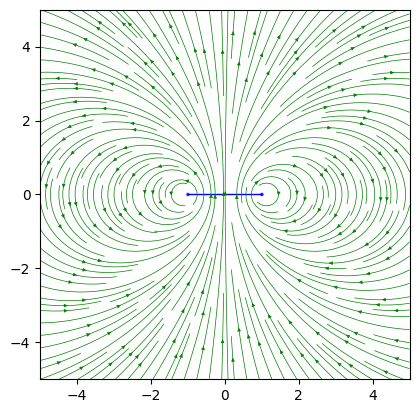

In [57]:
import matplotlib.pyplot as plt

def mark_loop(ax, x, a, color):
    ax.add_patch(Circle((x-a, 0), 0.03, color=color, alpha=0.7))
    ax.add_patch(Circle((x+a, 0), 0.03, color=color, alpha=0.7))
    shift = 0.01 if color == 'blue' else -0.01
    ax.add_artist(lines.Line2D([x-a, x+a], [shift,shift], linewidth=1, color=color))

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

xmin, xmax = -5, 5
zmin, zmax =  -5, 5
xx, zz = np.linspace(xmin, xmax, 151), np.linspace(zmin, zmax, 151)
xx_grid, zz_grid = np.meshgrid(xx, zz)

B = loop_field(xx_grid, 0, zz_grid, 1)[0]
# print(f'B: {B.shape}')
if 1: # this is more like it
    mark_loop(ax, 0, 1, 'blue')
    ax.streamplot(xx_grid, zz_grid, B[0], B[2], density=2, color='g',
                    linewidth=0.5, cmap=plt.cm.viridis, arrowsize=0.5)
    ax.set_aspect('equal')
    plt.show()

The field created by two loops with radii $a$ and $a_2$, currents $I=1$ and $I_2$, centered at $(0,0,0)$ and $(\xi_2,0,0)$:
$$
\bfB(a,x,y,z) + I_2\bfB(a_2,x-\xi_2,y,z)
$$

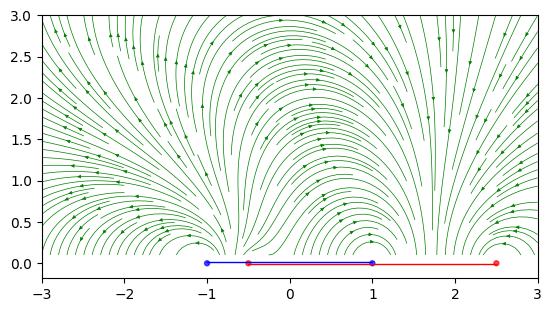

In [53]:
from matplotlib.patches import Circle
import matplotlib.lines as lines

xmin, xmax = -3, 3
zmin, zmax =  0.1, 3
xx, zz = np.linspace(xmin, xmax, 150), np.linspace(zmin, zmax, 150)
xx_grid, zz_grid = np.meshgrid(xx, zz)

a1, a2 = 1, 1.5 # radii of loops
I1, I2 = 1, -1  # currents, clockwise if negative
x1, x2 = 0, 1   # loop x-centers
B = I1*loop_field(xx_grid - x1, 0, zz_grid, a)[0] + \
    I2*loop_field(xx_grid - x2, 0, zz_grid, a2)[0]
# print(B)
if 1: 
    fig = plt.figure()
    ax  = fig.add_subplot(1, 1, 1)
    mark_loop(ax, x1, a1, 'blue')
    mark_loop(ax, x2, a2, 'red')
    ax.streamplot(xx_grid, zz_grid, B[0], B[2], density=2, color='g',
                    linewidth=0.5, cmap=plt.cm.viridis, arrowsize=0.5)
    ax.set_aspect('equal')
    plt.show()